# 世界温室气体排放与气温变化关联分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 数据读取

In [2]:
df_data = pd.read_excel('ClimateChange.xlsx','Data')
df_gt = pd.read_excel('GlobalTemperature.xlsx',header=0)

## 数据清洗

### 温室气体数据清洗

In [3]:
df_ghg = pd.DataFrame(df_data).loc[df_data['Series code'].isin(
        ['EN.ATM.CO2E.KT', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.ATM.GHGO.KT.CE', 'EN.CLC.GHGR.MT.CE'])]
df_ghg_nan = df_ghg.replace({'..':np.nan})
df_ghg_fill = df_ghg_nan.iloc[:,6:].fillna(method='ffill',axis=1).fillna(method='bfill',axis=1)
df_ghg_clean = df_ghg_fill.sum()
df_ghg_clean.index = pd.to_datetime(df_ghg_clean.index, format='%Y')
df_ghg_clean


1990-01-01    3.004621e+07
1991-01-01    3.142315e+07
1992-01-01    3.173059e+07
1993-01-01    3.200925e+07
1994-01-01    3.208108e+07
1995-01-01    3.240317e+07
1996-01-01    3.299217e+07
1997-01-01    3.306355e+07
1998-01-01    3.262173e+07
1999-01-01    3.272541e+07
2000-01-01    3.324150e+07
2001-01-01    3.337358e+07
2002-01-01    3.376922e+07
2003-01-01    3.519159e+07
2004-01-01    3.646938e+07
2005-01-01    3.831035e+07
2006-01-01    3.917146e+07
2007-01-01    4.001204e+07
2008-01-01    4.053880e+07
2009-01-01    4.053873e+07
2010-01-01    4.053873e+07
2011-01-01    4.053873e+07
dtype: float64

### 全球气温数据清洗

In [4]:
df_gt_index = pd.to_datetime(df_gt['Date'])
df_gt_reindex = pd.DataFrame(df_gt.iloc[:,[1,4]].values,
                            index=df_gt_index,
                            columns=[['Land Average Temperature',
                                      'Land And Ocean Average Temperature']]
                            )
df_gt_resample_A = df_gt_reindex.resample('A').mean()
df_gt_resample_Q = df_gt_reindex.resample('Q').mean()
df_gt_clean = df_gt_resample_A.loc['1990-12-31':'2010-12-31']
df_gt_clean

,Land Average Temperature,Land And Ocean Average Temperature
Date,,
1990-12-31,9.234167,15.629333
1991-12-31,9.179417,15.598000
1992-12-31,8.836583,15.453000
1993-12-31,8.866583,15.466417
1994-12-31,9.038750,15.535000
1995-12-31,9.347083,15.637833
1996-12-31,9.038917,15.524667
1997-12-31,9.202583,15.713833
1998-12-31,9.522667,15.826000


### 合并数据

In [9]:
df_merge_temp = pd.concat([df_gt_clean.reset_index(),df_ghg_clean.loc['1990':'2010'].reset_index()], axis=1)
df_merge = pd.DataFrame(df_merge_temp.iloc[:,[1,2,4]].values,
                       index=df_merge_temp['index'],
                       columns=['Land Average Temperature ','Land And Ocean Average Temperature',
                                'Total GHG']
                       )
df_merge_max_min = (df_merge - df_merge.min()) / (df_merge.max() - df_merge.min())

## 绘图

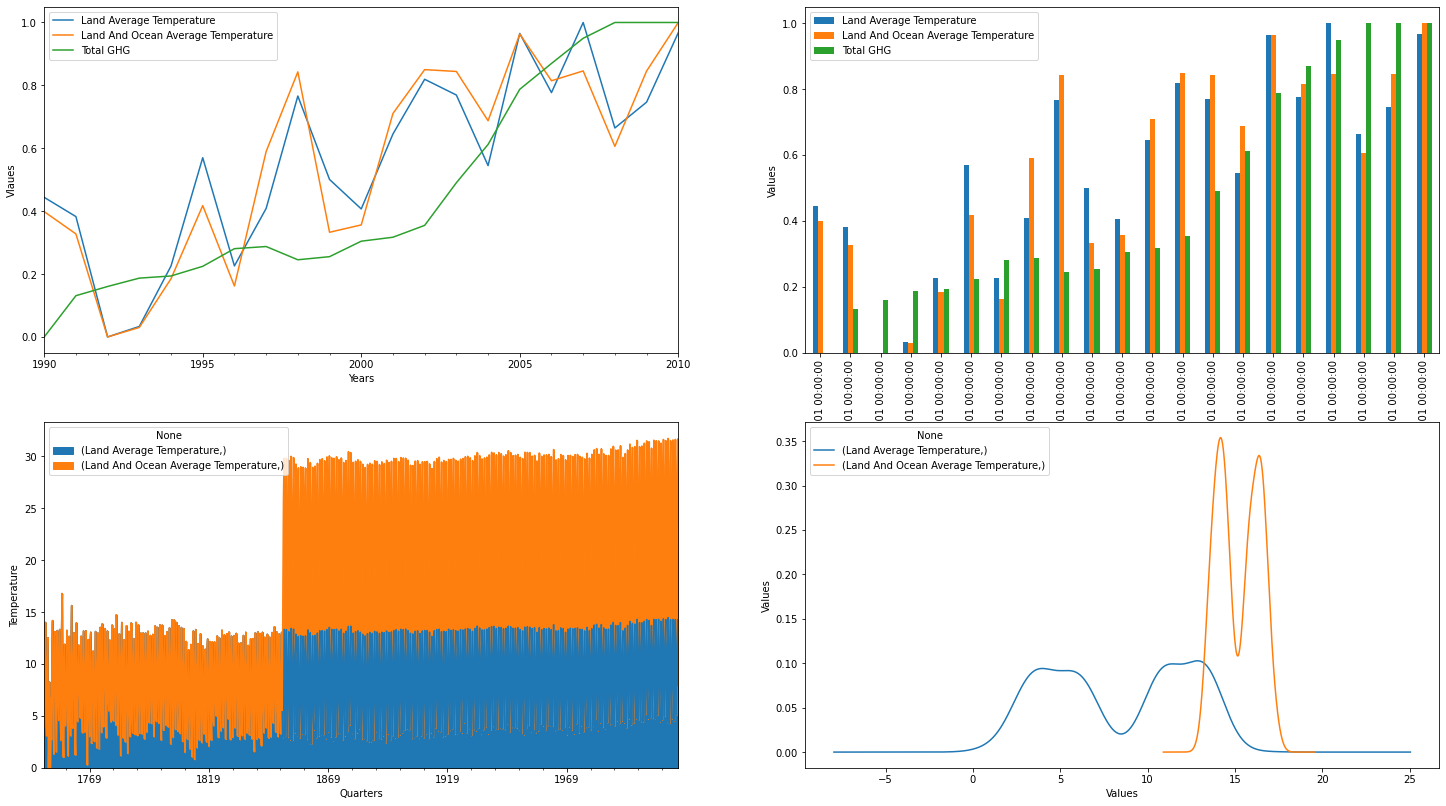

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ax1 =df_merge_max_min.plot(
    kind='line',
    figsize=(25,14),
    ax=axes[0,0],
)
ax1.set_xlabel('Years')
ax1.set_ylabel('Vlaues')

ax2 = df_merge_max_min.plot(
    kind='bar',
    figsize=(25,14),
    ax=axes[0,1],
)
ax2.set_xlabel('Years')
ax2.set_ylabel('Values')

ax3 = df_gt_resample_Q.plot(
    kind='area',
    figsize=(25,14),
    ax=axes[1,0],
)
ax3.set_xlabel('Quarters')
ax3.set_ylabel('Temperature')

ax4 = df_gt_resample_Q.plot(
    kind='kde',
    figsize=(25,14),
    ax=axes[1,1],
)
ax4.set_xlabel('Values')
ax4.set_ylabel('Values')

plt.show()
